In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = 'CTG_dropna.csv' 
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

In [3]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-07-21,16975.833984,17518.666016,16975.833984,21219.792969,21219.792969,4323115.0
2009-07-22,17518.666016,17716.058594,17271.923828,17469.318359,17469.318359,1923236.0
2009-07-23,17370.621094,18308.240234,17370.621094,18308.240234,18308.240234,1536637.0
2009-07-24,19196.509766,19196.509766,19196.509766,19196.509766,19196.509766,1297014.0
2009-07-27,20134.128906,20134.128906,19492.599609,20134.128906,20134.128906,6615957.0
2009-07-28,20134.128906,20627.611328,19591.296875,19640.644531,19640.644531,4069266.0
2009-07-29,19739.341797,19986.083984,19048.464844,19048.464844,19048.464844,2149465.0
2009-07-30,18653.677734,18999.117188,18258.890625,18703.027344,18703.027344,1682152.0
2009-07-31,18999.117188,19591.296875,18949.767578,19591.296875,19591.296875,3662303.0


In [4]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3702 entries, 2009-07-21 to 2024-05-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3702 non-null   float64
 1   High       3702 non-null   float64
 2   Low        3702 non-null   float64
 3   Close      3702 non-null   float64
 4   Adj Close  3702 non-null   float64
 5   Volume     3702 non-null   float64
dtypes: float64(6)
memory usage: 202.5 KB


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Percentage of Missing Data:
 Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


In [7]:
# Remove rows with missing values
data_cleaned = data.dropna()
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3.702000e+03
mean,17091.406723,17320.537431,16872.793573,17081.729988,17081.729988,4.836915e+06
std,6573.299641,6670.769459,6463.239718,6564.718853,6564.718853,6.307668e+06
min,8645.890625,8804.047852,8435.015625,8487.734375,8487.734375,1.168100e+04
25%,12534.482422,12688.578125,12341.895508,12487.442139,12487.442139,7.226552e+05
50%,14317.986328,14491.327148,14179.312500,14317.986328,14317.986328,2.548590e+06
75%,20568.315918,21077.578125,20091.013672,20679.699219,20679.699219,6.710182e+06
max,37788.390625,38065.734375,37303.035156,37719.050781,37719.050781,9.546854e+07


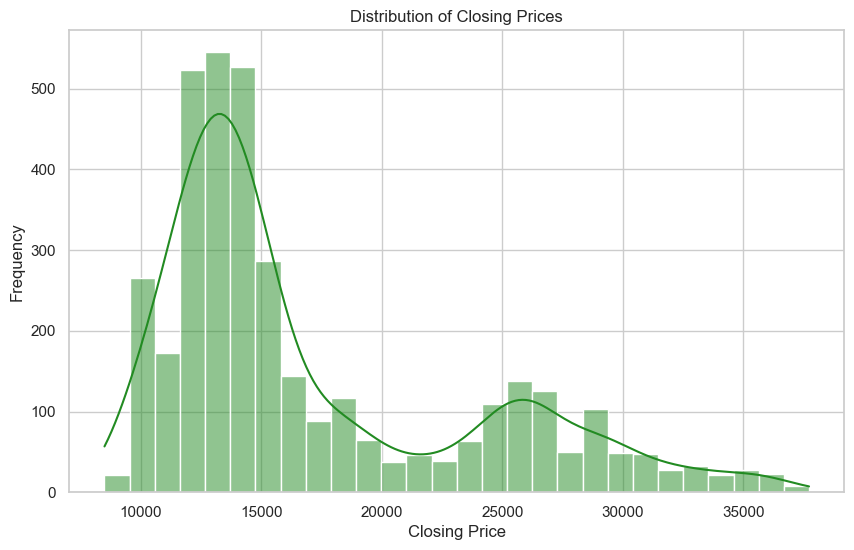

In [9]:
# Draw distribution of Closing Prices
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 
sns.histplot(data['Close'], color='forestgreen', kde=True) 
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Remove outliers for close data 
Q1 = data_cleaned['Close'].quantile(0.25)
print(Q1)
Q3 = data_cleaned['Close'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['Close'] >= lower_bound) & (data_cleaned['Close'] <= upper_bound)]

# Check
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

12487.44213875
20679.6992185
Original data shape: (3702, 6)
New data shape without outliers: (3605, 6)


In [11]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['Volume'].quantile(0.25)
Q3 = data_no_outliers_1['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['Volume'] >= lower_bound) & (data_no_outliers_1['Volume'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (3605, 6)
Data shape without outliers: (3400, 6)


In [12]:
data = data_no_outliers_2

In [13]:
# Choose variables
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split data for test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 2720 samples
Test set size: 680 samples


In [36]:
ridge = Ridge()
# Find best alpha
alphas = list(range(0, 10, 1))
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Start with best alpha
ridge_model_best_alpha = Ridge(alpha=best_alpha)
ridge_model_best_alpha.fit(X_train, y_train)

# Predict on Test
y_pred = ridge_model_best_alpha.predict(X_test)
mse_ridge_best_alpha = mean_squared_error(y_test, y_pred)
r2_ridge_best_alpha = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Test): {mse_ridge_best_alpha}')
print(f'R² Score (Test): {r2_ridge_best_alpha}')

# Predict on Train
y_train_pred = ridge_model_best_alpha.predict(X_train)
mse_ridge_best_alpha_train = mean_squared_error(y_train, y_train_pred)
r2_ridge_best_alpha_train = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error (Train): {mse_ridge_best_alpha_train}')
print(f'R² Score (Train): {r2_ridge_best_alpha_train}')

Best alpha: 9
Mean Squared Error (Test): 43680.67873495368
R² Score (Test): 0.9985100571760573
Mean Squared Error (Train): 23259.249401741487
R² Score (Train): 0.9992586485935819


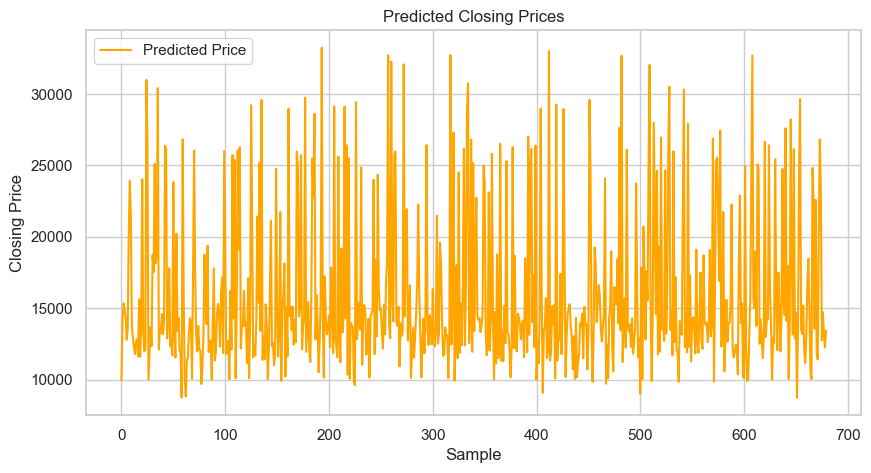

In [33]:
# Plot the predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_pred, label='Predicted Price', color='orange')
plt.xlabel('Sample')
plt.ylabel('Closing Price')
plt.title('Predicted Closing Prices')
plt.legend()
plt.show()

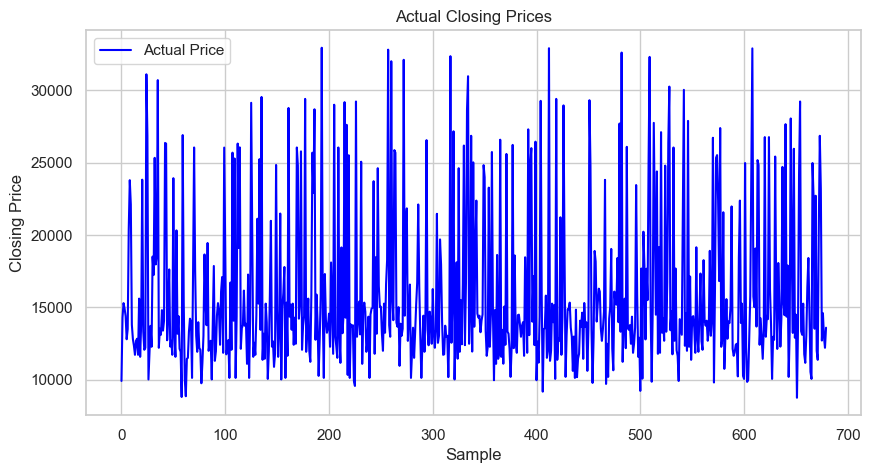

In [34]:
# Plot the actual prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.xlabel('Sample')
plt.ylabel('Closing Price')
plt.title('Actual Closing Prices')
plt.legend()
plt.show()

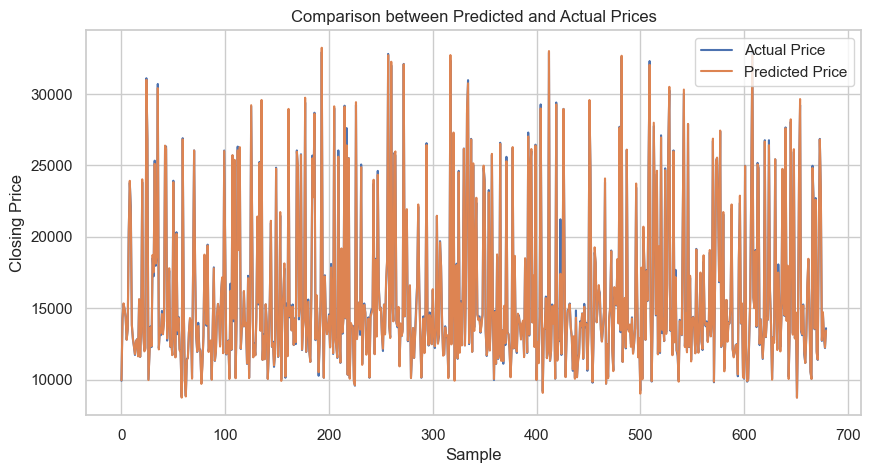

In [35]:
# Plot the comparison between predicted and actual prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.xlabel('Sample')
plt.ylabel('Closing Price')
plt.title('Comparison between Predicted and Actual Prices')
plt.legend()
plt.show()